#Machine Learning Engineer Nanodegree
##Model Evaluation & Validation
##Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

#Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [60]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


#Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

##Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [61]:
# Number of houses in the dataset
total_houses = np.size(housing_prices)

# Number of features in the dataset
total_features = np.shape(housing_features)

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: (506L, 13L)
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


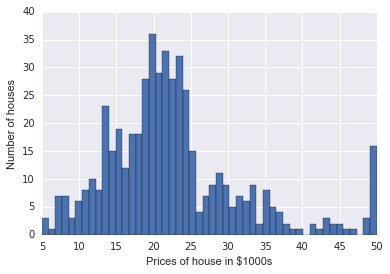

In [62]:
# The following histogram is Plotted to understand the notion of how spread the prices (distribution) are for the housing prices.
pl.hist(city_data.target,bins=50)
pl.xlabel('Prices of house in $1000s')
pl.ylabel('Number of houses')

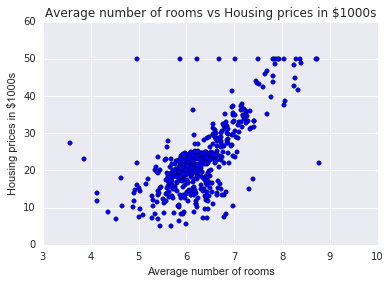

In [63]:
#The following 3 scatter plots are generated to help me understand which all are the fearues may 
#influence the housing prices in a linear or optimum quadratic line, which will let me understand the 
#most important features of all.

#1. Have tried with all the features and tried to observe how well an indiviual feature affects the 
#housing price or which gives a better hint about predicting a housing price with linear or quadratic line.

#2. After trying with different features, at last i chose the following 3 features (Gievn under Answer) 
#which i believe are most important.

pl.scatter(city_data.data[:,5],city_data.target)
pl.xlabel('Average number of rooms')
pl.ylabel('Housing prices in $1000s')
pl.title('Average number of rooms vs Housing prices in $1000s')

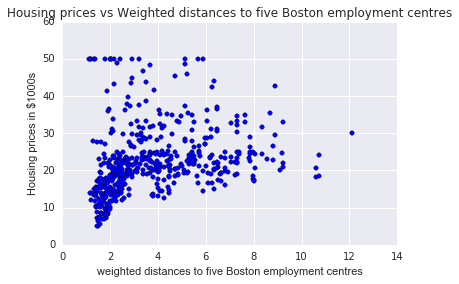

In [64]:
pl.scatter(city_data.data[:,7],city_data.target)
pl.xlabel('weighted distances to five Boston employment centres')
pl.ylabel('Housing prices in $1000s')
pl.title('Housing prices vs Weighted distances to five Boston employment centres')

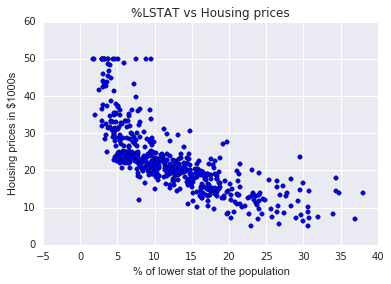

In [65]:
pl.scatter(city_data.data[:,12],city_data.target)
pl.xlabel(' % of lower stat of the population')
pl.ylabel('Housing prices in $1000s')
pl.title('%LSTAT vs Housing prices')

##Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **
The following three Attributes , i believe to have a strong influence in predicting the Housing prices closely.

6. RM: average number of rooms per dwelling

    Intuition: One of the most important creteria in choosing the Home and its prices, depends upon the Number of Rooms it contains. I believe, total number of rooms most likely to give the following information which are closely associated with House pricing;
    a) Average number of rooms (RM) make good approximation about the 'AREA' of House, which is a hidden information , but inferred approximately using RM-average number of rooms per dwelling.
    b) This also gives indirectly an information about an average number of inhabitants in individuals home likely to be which in turn getting to know an average expenditure in buying a new home with respect to number of inhabitants
    
    Statistical view: By trying to fit this fearure 'RM' and 'Housing prices', there is a very much linear fit between the two (Feature and Target value.i.e. housing prices). This is in comparison to other available features in the dataset as we could see MOST of the data points of all the houses feature (in this case 'RM') goes linearly with the housing prices. So it is believed to be having the major influence in predicting the housing prices.
   
8. DIS: weighted distances to five Boston employment centres
    Intuition: The House prices are most likely to be influenced when they are in place where there is a great accessibility to individuals workplace for daily commuting.Here i imagine a 'Demand' tag for the houses which has less distances from the the 'Five Boston employement centres' which makes the Inhabitants ready to pay more for one of their comfortness (Commuting for work).
    
    Statistical view: By trying to fit a line with linear/polynomial view, there is a better spreadout can be seen with respect to prices. Most of the data points can be drawn as second order polynomial along the line. Thus i felt that, this feature can play an important role in predicting the housing prices which is unknown.
    
9. %LSTAT: lower status of the population
    Intuition: Impact is being very close to 'DIS: weighted distances to five Boston employment centres' and at the same time, the accessibility to highways give an edge in rise of prices due to its well connectivity.
    Statistical view: By trying to fit in the similar way,i felt that the most of the data points (feature=%LSTAT) can be fit as a linear. So when doing that, there is an inference that this particular feature may play an important role as well in predicting the Housing prices.
    

##Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [66]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **

RM :5.609
DIS : 1.385
LSTAT : 12.13

#Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

##Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [67]:
# Put any import statements you need for this code block here
from sklearn import cross_validation
def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
        
    # Shuffle and split the data
    X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.3,random_state=0)
  
    # Return the training and testing data subsets
    return X_train, y_train, X_test,y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


In [68]:
#Tried to see the shape of the 'Training' and 'Testing' Set.
X_train.shape

(354L, 13L)

In [69]:
X_test.shape

(152L, 13L)

In [70]:
y_train.shape

(354L,)

In [71]:
y_test.shape

(152L,)

##Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
We need to split the data into Training and Test for the following main reasons;

1. To ensure that the 'model' has learned to predict the target values for unknown features over the different possible scenerios at all the times (Gives an estimate of performance on an independent datasets)

2. To ensure that the 'model' has not only to known to predict for given features but getting tested with different sets for the chosen problem, gives an advantage for another sets of features.  (This helps in avoiding 'overfitting' while training the model.)

##Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know if the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [72]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    
    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


In [73]:
total_error

0.0

##Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **

The following performance metrics were considered for predicting housing prices and specific reasons are provided for individual metric saying why or why not the metric is considerd.

- *Accuracy*
Accuracy is described as whether the number of samples are classified or labeld as 'correct' or 'not. Our problem is associated with 'Prediction of continous value output' , here in this case as Housing price. There will be a specific number as an outcome in our Model. So this metric will not be applicable to see how well the model is performing. 'Accuracy' is seen good for classification problems of which, the outcome is discrete.i.e whether the model predicts 'accrateley' or 'not'. 

- *Precision* & *Recall* 
There 2 performance metrics deal with the specific approximation and probability of choosing the labels for the given dataset. Represented as a 'Discrete' outcome which are pertaining to 'Classification' problems. Since, our model is dealing with predicting the specific number , which is here the most important thing is to see how well the predicted value is close to the data set (opposite to 'Discrete)

- *F1 Score*
F1 score is a weighted average of Precision and Recall, which is as below;

F1 = 2 * (precision * recall) / (precision + recall)

In this case of F1 score too , the error is expected to perform for 'Discrete' outcome. This is another way of to know the performance of model similar to 'Precision' and 'Recall'

- *Mean Absolute Error (MAE)*
Mean Absolute Error is one of the USABLE performanece metric for our Problem-Housing prices prediction. It implies;

1. Calculating the difference between each data point to the mean as an absolute value. 

[Making absolute is due to the fact that the deviation is same when the data point is above or below the mean]
This one was very closely considered to be used as a performance metric. 

- *Mean Squared Error (MSE)*

The chosen performance metric is 'Mean Squared Error'. The following are the reasons for the same;

1. It gives an 'Error' in absolute values, i.e.positive always due to 'Squaring' the differences between the 'y_true' and 'y_predict' values, which is easy to quantify easily.(As same as MSE)

By squaring the differences, it gives more weightage to higher deviations when calculating the Mean Squared Error, which impacts the overall performance of the model. Thus Making the 'Mean Squared Error (MSE) preferred over 'Mean Absolute Error'

2. Choosing the 'Mean Squared Error' provides a good estimate to compare with how different datasets are spread over from mean value (i.e. Standard deviation when dividing by total number of data points).

##Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [74]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn import grid_search
def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    # Correction is made here after a review from Udacity. I corrected greater_is_better from 'default' to False
    scoring_function = make_scorer(mean_squared_error,greater_is_better=False)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor, parameters,scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg


# Test fit_model on entire dataset
try:
   reg = fit_model(housing_features, housing_prices)
   print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


##Question 5
*What is the grid search algorithm and when is it applicable?*

Grid search algorithm is an algorithm which is used to fine tune the parameters used in the predictive model.

Gridsearch algorithm is applicable when there is a need to fine tune the parameters to best fit the modelwithout much work in comparison to other methods (Guess/Try methods)

It fits the data for different parameters using the scoring function taking note of given range of parameters for a particular method of prediction (DecisionTreeRegression in this case)

**Answer: **

##Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **

Cross validation is a method for estimating the predictive accuracy of the Model and a way to ensure that the model learns fair in all the sets of given data. This is done by splitting the dataset by training and testing data in successive combinations keeping testing data as different each time.

For example:

Step 1 : Splitting the total data set into 10 (most times uniform) sets. Lets say K=10

Step 2 : Consider 1 set as testing set with remaining (K-1) sets for training the model

Step 3 : Choose a different set now and keeping the remaining sets for training the model

Step 4 : Step 2 and 3 makes all the sets of data (different samples in the population) to train the model.

The above Cross validationn procedure ensures the model is fair for any unknown new dataset.

Grid search algorithm is useful when the parameters are not learned within the estimators, so that it can be set by Grid search by looking into the given range of parameters.


#Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [75]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,2,4,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


C:\Users\marimuthuananthavelu\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\marimuthuananthavelu\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


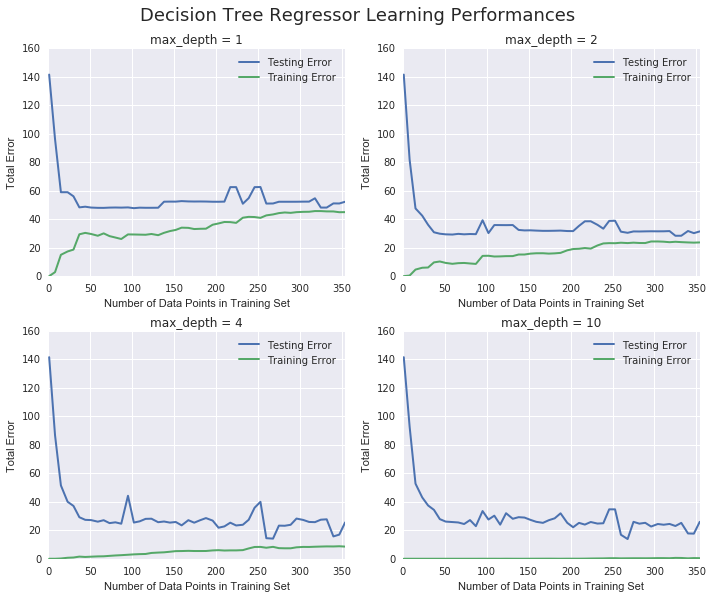

In [76]:
learning_curves(X_train, y_train, X_test, y_test)

In [77]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

#Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

##Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **

The max depth for the chosen model is :1

As the size of the training set increases, i see the training error is increasing.(High Bias)

As the size of the training set increases, i see the testing error is decreasing.

##Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

For the model with a max depth of 1:

When the model is using the full training set, the model is suffered by high Bias. This is because of the following reasons;

1. Increase in training set increases the Training error. The error for 'Training' and 'Testing' sets remain high at the end of training set where both the errors converge into. Thus the model is not performing well in both the Training and Testing sets.  

2. Providing more data to the model does not help much in this case for better predictive model.

For the model with a max depth of 10:

When the model is using the full training set, it suffers by high Variance. This is because of the following reasons;

1.The model exactly memorizes the 'training set' whereas virtually the 'Training set' error as NIL, but when it comes to 'Testing set' the testing error remain high. Thus it cannot predict and generalize well for an unseen new dataset.

Reference :http://scott.fortmann-roe.com/docs/BiasVariance.html

Creating a model complexity graph. . . 


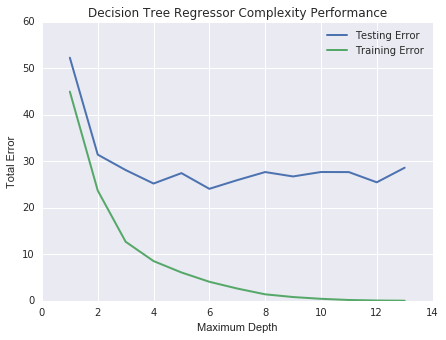

In [78]:
model_complexity(X_train, y_train, X_test, y_test)

##Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **

The Testing error decreases and at a certain point it starts to increase again whereas training error continue to decrease from the beginning.

The region where the testing error touches the minimum and starts to increase again, is the spot where the optimum performance of the model. Thus with 'Maximum depth' of 4, the model is likely to perform better.

Reference :http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png

#Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. *To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

##Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [79]:
print "Final model optimal parameters:", reg.best_params_

Final model optimal parameters: {'max_depth': 4}


**Answer: **

The optimal 'max_depth' for the model using grid search algorithm is 4. I understand that the performance of the model is measured on the testing set.

The indication in the testing error to have an optimum model is, the testing error is decreases and at certain point ,it starts to increase when looking at the model complexity.

My initial intuition was expecting the value somewhere in the middle but not definitely on the start or end of defined parameters range.
When i study through the DecisionTreeRegressor, i will evaluate my thoughts as and often.

##Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [80]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 21.630


**Answer: **

The best selling price for my clients home shall be (in $1000s):21.630. 
This price is closer to our original dataset's mean and median housing price 
Mean house price: 22.533,
Median house price: 21.2.


##Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

The following are the reasons to conclude that this model fairly predicts the Housing price for an unknown dataset;

1.Looking at the three most important features listed above for clients features,i.e. 

    'RM' - average number of rooms per dwelling [Client feature :5.609] 
    'DIS' - weighted distances to five Boston employment centres Intuition [Client feature :1.385] 
    '%LSTAT' - lower status of the population Intuition [Client feature :24] 
    
I tried to visualize  the Housing price individually with respect to above 3 important features.      It looks the data point in all the three plots fall very close to the predicted price by the  model.

The single variable linear fit for the above features separately are as below;



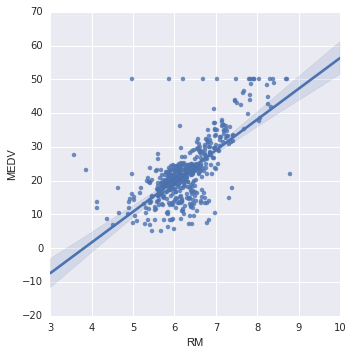

In [81]:
import pandas as pd
from pandas import Series,DataFrame
boston_df=DataFrame(city_data.data)
import seaborn as sns
boston_df.columns=city_data.feature_names
boston_df['MEDV']=housing_prices
sns.lmplot('RM','MEDV',data=boston_df)

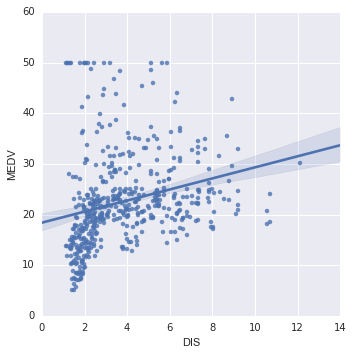

In [82]:
sns.lmplot('DIS','MEDV',data=boston_df)

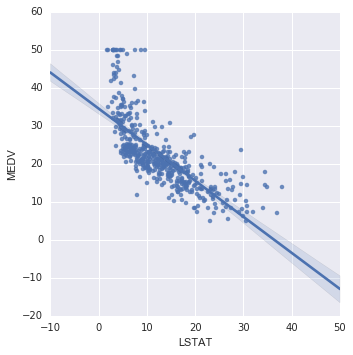

In [83]:
sns.lmplot('LSTAT','MEDV',data=boston_df)

2. The complexity curve indicated the close associate between Training and Testing Error with the chose 'Max_depth' parameter.

Considering the above facts, it is fairly to believe that the chosen model will predict the good price for an unknown dataset in Boston.